## EDA와 시각화

### 1. EDA의 의미
__EDA의 주제__
+ 저항성의 강조 : 이상치 등 부분적 변동에 대한 민감성 확인
+ 잔차 계산 : 관찰 값들이 주 경향에서 벗어난 정도 파악
+ 자료변수의 재표현 : 변수를 적당한 척도로 바꾸는 것
+ 그래프를 통한 현시성 : 분석 결과를 이해하기 쉽게 시각화하는 것

### 2. 막대그래프와 히스토그램

막대그래프

In [2]:
# 시각화를 위한 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plotting 환경 설정
plt.rcParams['figure.figsize'] = (5,5) # 그래프 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 글꼴
plt.rcParams['font.size'] = 12 # 글꼴 크기
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표기

# warnings 메세지 표시 안하기
import warnings
warnings.filterwarnings(action='ignore')

In [11]:
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns= wine_load.feature_names)
wine['Class'] = wine_load.target
wine.Class = wine.Class.map({0 : 'class_0', 1 : 'class_1', 2 : 'class_2'})

In [13]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [14]:
wine.Class.value_counts()

Class
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

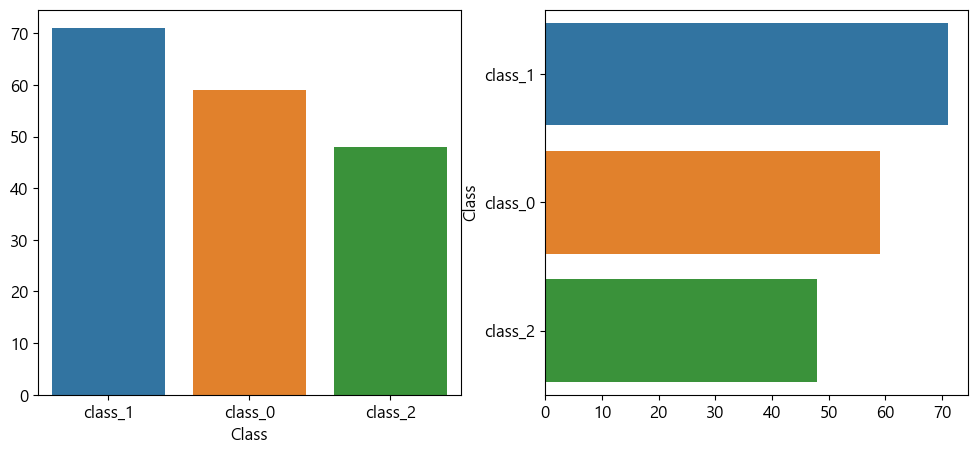

In [41]:
fig, ax = plt.subplots(1,2, figsize = (12, 5))
sns.barplot(x = wine.Class.value_counts().index, y = wine.Class.value_counts().values, ax = ax[0])
sns.barplot(x = wine.Class.value_counts().values, y = wine.Class.value_counts().index, ax = ax[1])
plt.show()

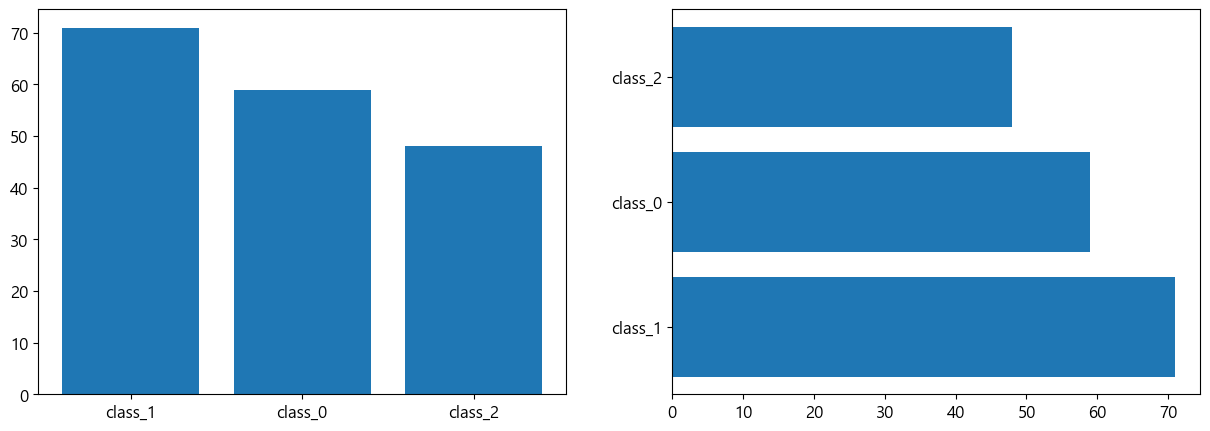

In [40]:
fig, ax = plt.subplots(1,2,figsize = (15, 5))
ax[0].bar(wine.Class.value_counts().index, wine.Class.value_counts().values)
ax[1].barh(wine.Class.value_counts().index, wine.Class.value_counts().values, height=0.8)
plt.show()

히스토그램

In [43]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


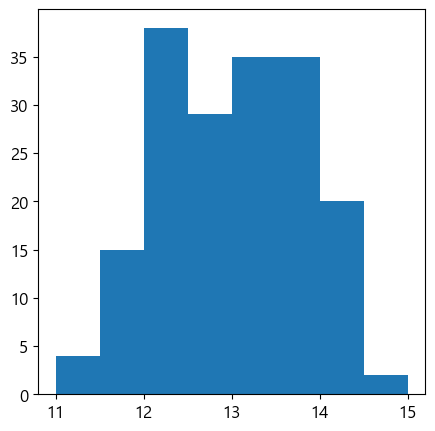

In [48]:
# alcohol 컬럼을 히스토그램으로 그래고 해석해보자
plt.hist(data = wine, x = 'alcohol', bins = 8, range=(11, 15))
plt.show()

# 11~15 범위를 8개의 구간으로 나누어 표기한 히스토그램
# 가장 많은 분포는 12~12.5 구간이고 그 다음으로는 13~14 구간이다
# 정규분포를 모양을 하고 있지않고 12~14 구간에 밀집되어 있음

### 3. 상자 그림(Box plot)

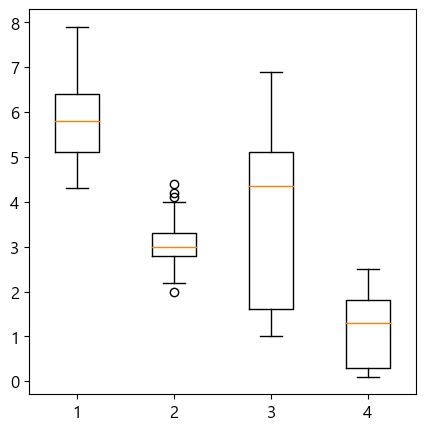

In [120]:
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris.Class = iris.Class.map({0 : 'setosa', 1 : 'versicolor', 2 : 'virginica'})

# boxplot 그리기
plt.boxplot(iris.drop(columns='Class'))
plt.show()

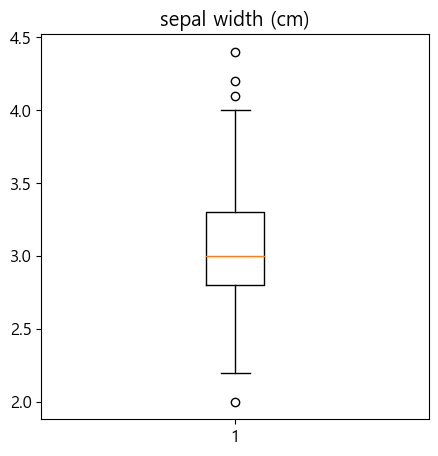

In [121]:
# 하나의 컬럼만 boxplot 으로 표현
plt.boxplot(iris['sepal width (cm)'], whis = 1.5)
plt.title('sepal width (cm)')
plt.show()

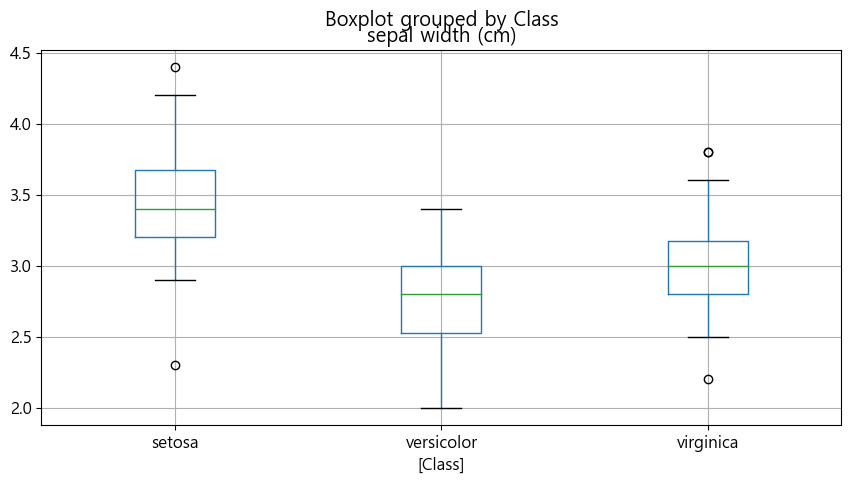

In [122]:
# 한 컬럼을 카테고리에 따라 boxplot 표현
iris[['sepal width (cm)', 'Class']].boxplot(by = 'Class', figsize=(10,5))
plt.show()

<Axes: xlabel='Class', ylabel='sepal width (cm)'>

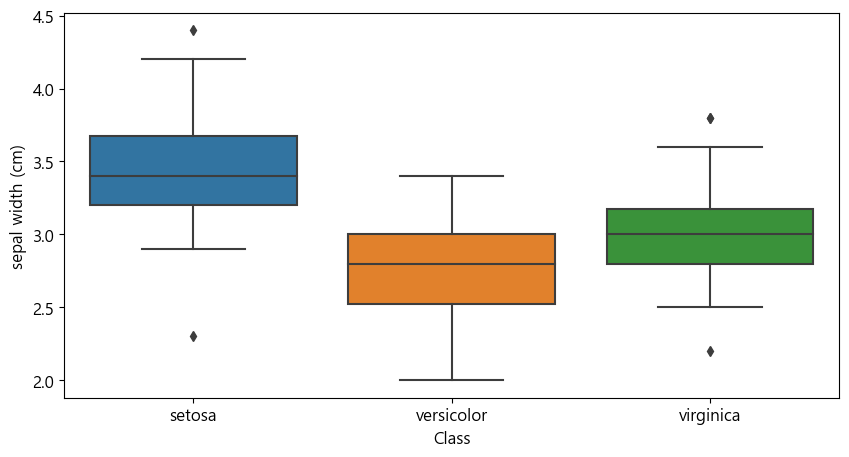

In [123]:
# seaborn 을 이용한 boxplot
fig, ax = plt.subplots(1,1,figsize = (10, 5))
sns.boxplot(data = iris, x = 'Class' , y = 'sepal width (cm)')

### 4. 산점도 (scatter plot)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

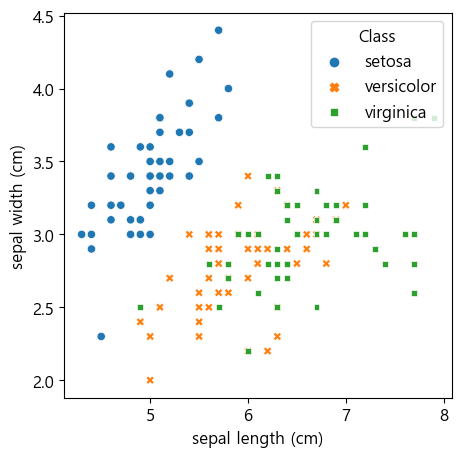

In [124]:
# plt.scatter(data = iris, x = 'sepal length (cm)', y = 'sepal width (cm)')
sns.scatterplot(data = iris, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'Class', style= 'Class')

### 5. 선그래프

수평선, 수직선 그래프

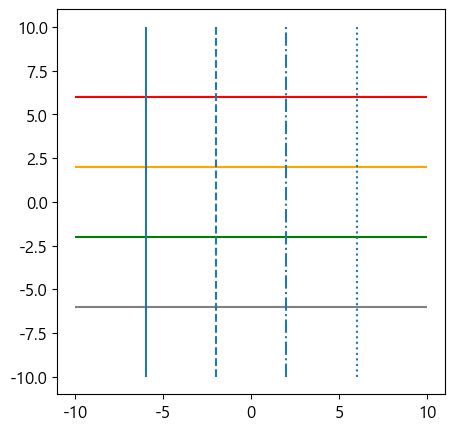

In [125]:
plt.hlines(-6, -10, 10, color = 'grey')
plt.hlines(-2, -10, 10, color = 'green')
plt.hlines(2, -10, 10, color = 'orange')
plt.hlines(6, -10, 10, color = 'red')
plt.vlines(-6, -10, 10, linestyles = 'solid')
plt.vlines(-2, -10, 10, linestyles = 'dashed')
plt.vlines(2, -10, 10, linestyles = 'dashdot')
plt.vlines(6, -10, 10, linestyles = 'dotted')
plt.show()

함수식 그래프

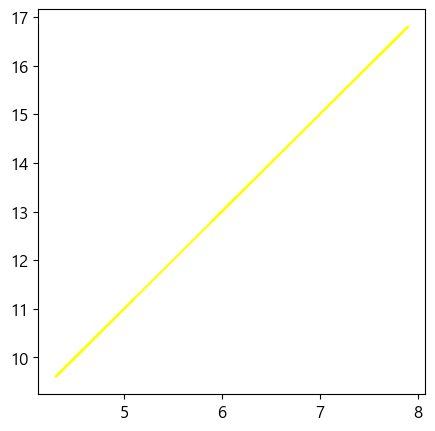

In [126]:
X = iris['sepal length (cm)']
plt.plot(X, 2*X + 1, c = 'yellow')
plt.show()

회귀선 그래프

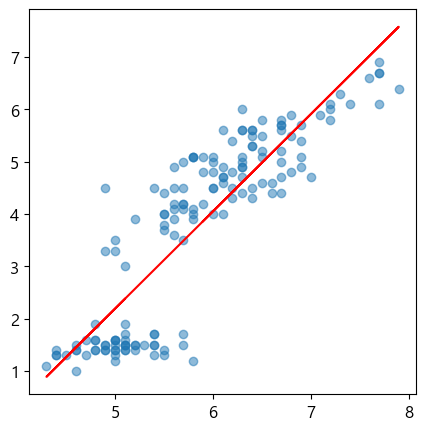

In [127]:
X, Y = iris['sepal length (cm)'], iris['petal length (cm)']
b1, b0 = np.polyfit(X, Y, 1)
plt.scatter(X, Y, alpha=0.5)
plt.plot(X, b1*X + b0, color = 'r')
plt.show()

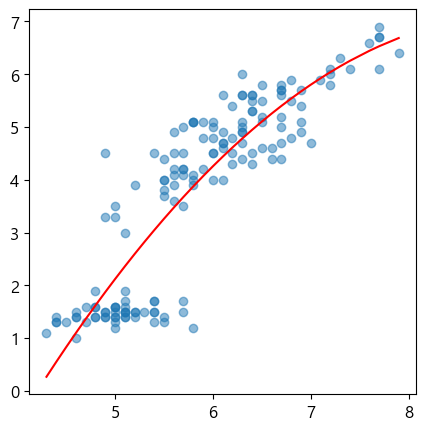

In [128]:
iris2 = iris.sort_values(by = 'sepal length (cm)')
X, Y = iris2['sepal length (cm)'], iris2['petal length (cm)']
b2, b1, b0 = np.polyfit(X, Y, 2)
plt.scatter(X, Y, alpha = 0.5)
plt.plot(X, b0 + b1 * X + b2 * X **2 , color = 'red')

꺾은선 그래프

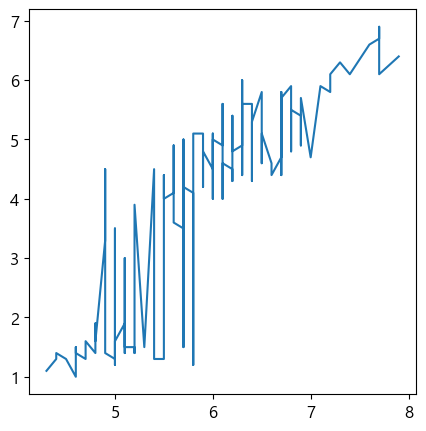

In [129]:
plt.plot('sepal length (cm)', 'petal length (cm)', data = iris2)
plt.show()

In [130]:
iris2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
13,4.3,3.0,1.1,0.1,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa


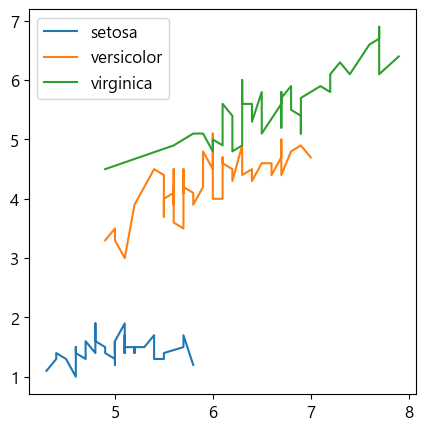

In [133]:
plt.plot('sepal length (cm)', 'petal length (cm)', data = iris2.loc[iris2['Class'] == 'setosa'])
plt.plot('sepal length (cm)', 'petal length (cm)', data = iris2.loc[iris2['Class'] == 'versicolor'])
plt.plot('sepal length (cm)', 'petal length (cm)', data = iris2.loc[iris2['Class'] == 'virginica'])
plt.legend(iris2.Class.unique())
plt.show()

### 6. 상관관계 시각화

산점도 행렬

__KDE 그래프__  
KDE는 히스토그램과 함께 밀도 추정 방법 중 하나이다.

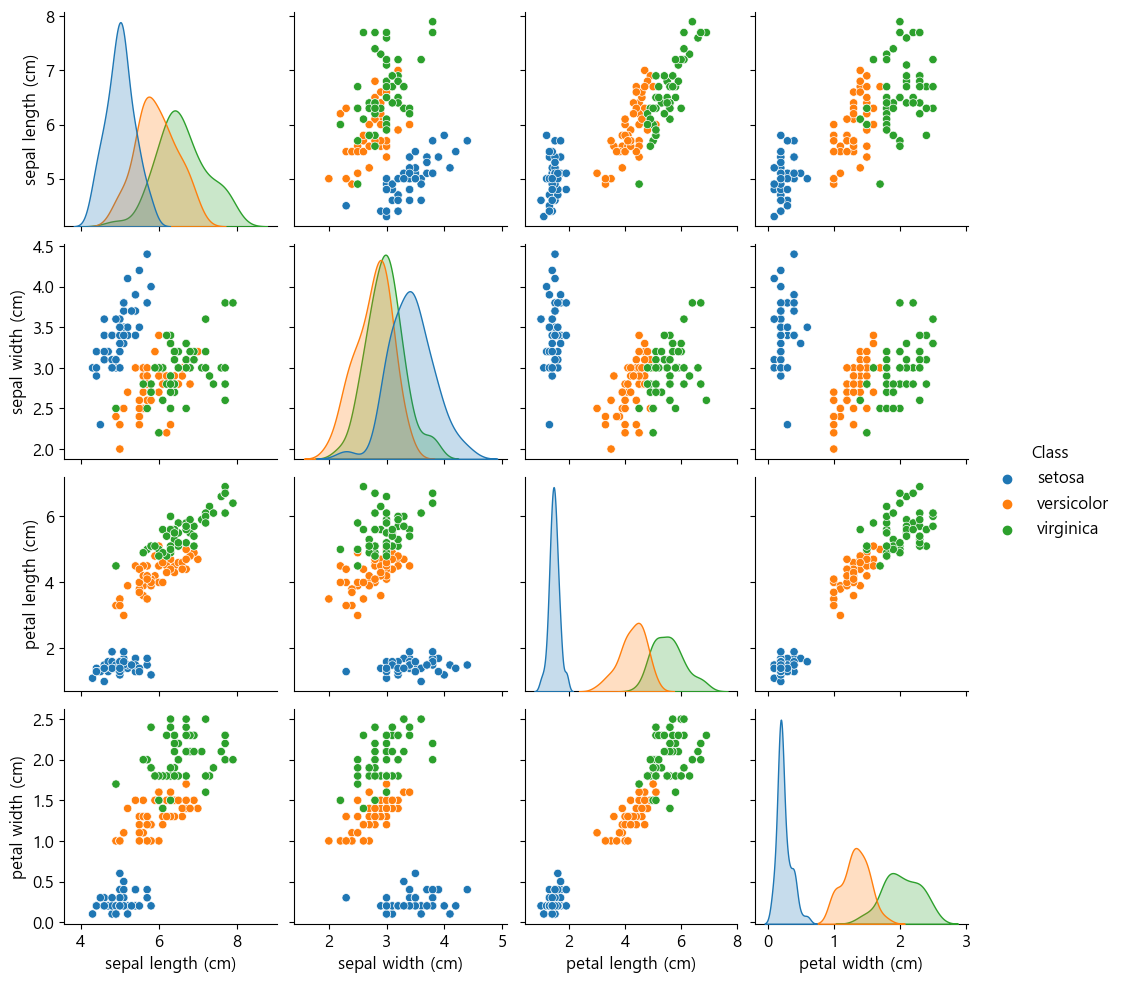

In [144]:
sns.pairplot(iris, hue = 'Class', diag_kind='kde')
plt.show()

상관계수 행렬, 히트맵

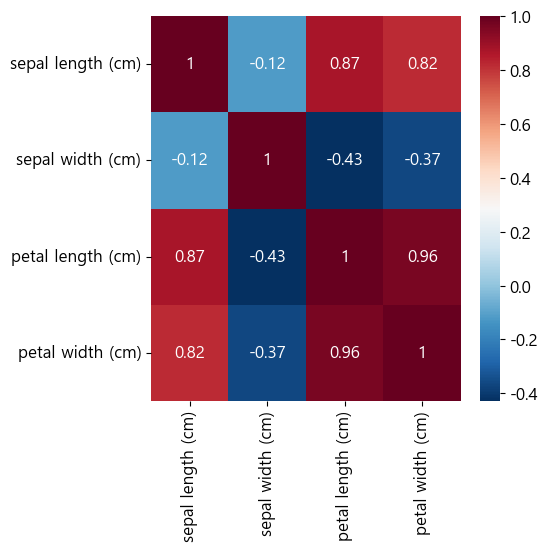

In [156]:
iris_corr = iris.drop(['Class'], axis = 1).corr(method='pearson')
sns.heatmap(iris_corr, xticklabels=iris_corr.columns, yticklabels= iris_corr.columns, annot = True, cmap = 'RdBu_r')
plt.show()

### 7. pandas profiling

Pandas Profiling 제공 기능
+ Overview : 데이터세트의 통계정보 및 컬럼의 체크 사항
+ Variables : 컬럼의 통계정보와 Null 정보, 히스토그램 또는 막대그래프 등
+ Interactions : 컬럼쌍별 산점도
+ Correlations : 상관계수 결정 방식별 상관행렬 그래프
+ Missing values : 값의 개수 및 Null 값의 존재 여부 확인
+ Sample : 가장 처음과 마지막의 10개의 값
+ Duplicate rows : 중복행

Pandas Profiling 수행

In [160]:
# !pip install pandas-profiling

from pandas_profiling import ProfileReport
ProfileReport(iris)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]